# **Dataset Exploration**

In [ ]:
import re
import nltk
import string
import pandas as pd
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/depression/sentiment_tweets311.csv", encoding='ISO-8859-1')
df.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df.shape

(13819, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13819 non-null  int64 
 1   message     13819 non-null  object
 2   label       13819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 324.0+ KB


In [ ]:
df['label'].value_counts()

,count
label,
0,8009
1,5810


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

print(df.head())

                                             message  label
0  just had a real good moment. i missssssssss hi...      0
1         is reading manga  http://plurk.com/p/mzp1e      0
2  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3  @lapcat Need to send 'em to my accountant tomo...      0
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13814,False
13815,False
13816,False
13817,False


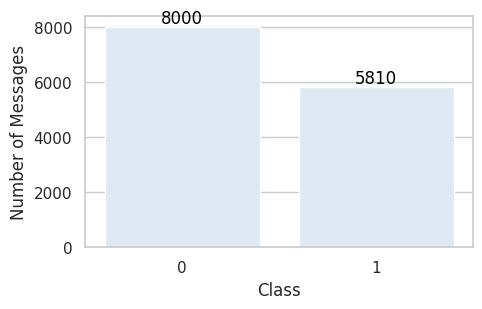

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the class labels based on your dataset
class_labels = ['0', '1']

# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Set the style and palette for the plot
sns.set(style="whitegrid")
sns.set_palette("Blues")

# Create the plot with a specified size
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=class_labels, y=class_counts, ax=ax)

# Annotate the bars with counts
for bar, count in zip(ax.patches, class_counts):
    ax.annotate(f'{count}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', color='black', fontsize=12)

# Set the labels for the axes
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Number of Messages', fontsize=12)

# Display the plot
plt.show()


<ipython-input-5-a3bc93a00c9d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis') # Use a visually appealing palette


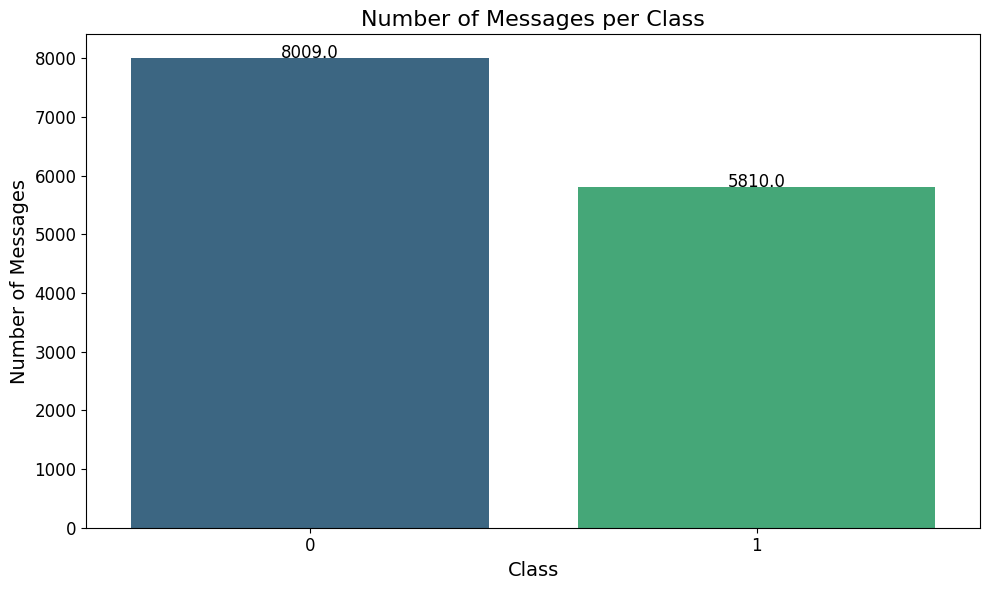

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_counts = df['label'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
sns.countplot(x='label', data=df, palette='viridis') # Use a visually appealing palette

# Customize the plot
plt.title('Number of Messages per Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Messages', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value annotations to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 1, height, ha='center', fontsize=12)

# Improve the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
missing=df.isnull().sum()
print(missing)

message    0
label      0
dtype: int64


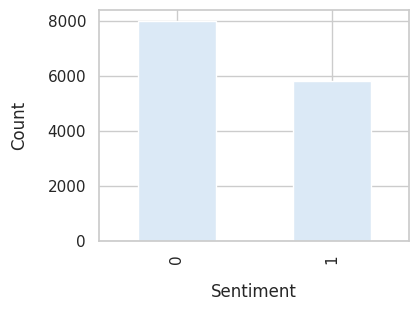

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the value counts of the 'label' column
df['label'].value_counts().plot(kind='bar', figsize=(4, 3))

# Set the labels for the x-axis and y-axis
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Count", labelpad=14)

# Display the plot
plt.show()

# **Preprocessing**

In [ ]:
tweet=df.message

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stopwords.remove('not')
stemmer = PorterStemmer()

def preprocess(tweet):

    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ',regex=True)

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '',regex=True)

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '',regex=True)

    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ",regex=True)
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())

     # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])

    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet

    return tweets_p

processed_tweets = preprocess(tweet)

df['processed_messages'] = processed_tweets
print(df[["message","processed_messages"]].head(10))

                                             message  \
0  just had a real good moment. i missssssssss hi...   
1         is reading manga  http://plurk.com/p/mzp1e   
2  @comeagainjen http://twitpic.com/2y2lx - http:...   
3  @lapcat Need to send 'em to my accountant tomo...   
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
5              so sleepy. good times tonight though    
6  @SilkCharm re: #nbn as someone already said, d...   
7              23 or 24Ã¯Â¿Â½C possible today. Nice    
8        nite twitterville  workout in the am  -ciao   
9    @daNanner Night, darlin'!  Sweet dreams to you    

                                  processed_messages  
0                 real good moment missssssssss much  
1                                         read manga  
2                                                     
3  need send em account tomorrow oddli even refer...  
4                    add myspac myspac com lookthund  
5                    sleepi good time tonight though 

In [ ]:
df.to_csv("preprocessedfirst.csv")

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13805,False
13806,False
13807,False
13808,False


In [ ]:
import pandas as pd
df = pd.read_csv("/content/preprocessedfirst.csv")

In [ ]:
df.dropna(subset=['processed_messages'], inplace=True)

In [ ]:
df['label'].value_counts()

,count
label,
0,7970
1,5763


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

print(df.head())

                                             message  label  \
0  just had a real good moment. i missssssssss hi...      0   
1         is reading manga  http://plurk.com/p/mzp1e      0   
3  @lapcat Need to send 'em to my accountant tomo...      0   
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0   
5              so sleepy. good times tonight though       0   

                                  processed_messages  
0                 real good moment missssssssss much  
1                                         read manga  
3  need send em account tomorrow oddli even refer...  
4                    add myspac myspac com lookthund  
5                    sleepi good time tonight though  


In [ ]:
df.to_csv("preprocessedsec.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/depression/send/preprocessedsec.csv")

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13719,False
13720,False
13721,False
13722,False


# **Feature Extraction**

In [ ]:
dt_transformed=df[['label','processed_messages']]
y=dt_transformed.iloc[:,:-1].values

In [ ]:
print(dt_transformed)

       label                                 processed_messages
0          0                 real good moment missssssssss much
1          0                                         read manga
2          0  need send em account tomorrow oddli even refer...
3          0                    add myspac myspac com lookthund
4          0                    sleepi good time tonight though
...      ...                                                ...
13728      0  may not answer trust everyth work time day new...
13729      0  woke today feel lighter like mayb thing start ...
13730      0  take one step time life perfect grate littl mo...
13731      0  today new day choos focu thing make happi matt...
13732      0  sometim life tough learn embrac challeng growt...

[13733 rows x 2 columns]


In [ ]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
y=np.array(ct.fit_transform(y))

In [ ]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
y_df=pd.DataFrame(y)
y_nondep=np.array(y_df[0])
y_dep=np.array(y_df[1])

In [ ]:
print(y_df)

         0    1
0      1.0  0.0
1      1.0  0.0
2      1.0  0.0
3      1.0  0.0
4      1.0  0.0
...    ...  ...
13728  1.0  0.0
13729  1.0  0.0
13730  1.0  0.0
13731  1.0  0.0
13732  1.0  0.0

[13733 rows x 2 columns]


In [ ]:
!pip install gensim==4.2.0
!pip install scikit-learn==1.5.2
!pip install scipy==1.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/depression/send/preprocessedsec.csv")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assume df['processed_messages'] contains the processed text messages

# Bag of Words
#vectorizer_bow = CountVectorizer()
#X_bow = vectorizer_bow.fit_transform(df['processed_messages'])

# N-grams (Bigrams and Trigrams)
#vectorizer_ngrams = CountVectorizer(ngram_range=(2, 3))
#X_ngrams = vectorizer_ngrams.fit_transform(df['processed_messages'])

# TF-IDF
#vectorizer_tfidf = TfidfVectorizer()
#tfidf_features = vectorizer_tfidf.fit_transform(df['processed_messages'])

# LDA
#lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
#X_lda = lda_model.fit_transform(X_bow)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['processed_messages'] )
tfidf


<13733x4001 sparse matrix of type '<class 'numpy.float64'>'
	with 104606 stored elements in Compressed Sparse Row format>

In [ ]:
from pandas.core.frame import DataFrame
p=DataFrame(tfidf)

In [ ]:
p.head()

,0
0,"(0, 2782)\t0.4214115762478841\n (0, 1401)\t..."
1,"(0, 2776)\t1.0"
2,"(0, 2277)\t0.20749105380938423\n (0, 2997)\..."
3,"(0, 30)\t0.39820971779869035\n (0, 2264)\t0..."
4,"(0, 1401)\t0.26651672757548955\n (0, 3490)\..."
